<SPAN STYLE="color:#5d00ff; font-size: 30pt"><strong>Ensemble Learning Project</strong></SPAN>

<SPAN STYLE="color: #ff006a ; font-size: 20pt"><strong>About Project: </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>Domine : Banking
            <br>Objective : The classification goal is to predict if the client will subscribe(yes/no) for term deposit.
            <br>Context : Leveraging customer information is paramount for most
businesses. In the case of a bank, attributes of customers like
the ones mentioned below can be crucial in strategizing a
marketing campaign when launching a new product.
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff006a ; font-size: 20pt"><strong>About Dataset : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>The data is related with direct marketing campaigns of a
Portuguese banking institution. The marketing campaigns
were based on phone calls. Often, more than one contact to
the same client was required, in order to access if the product
(bank term deposit) would be ('yes') or not ('no') subscribed.
        <b>
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff006a ; font-size: 20pt"><strong>Data set Attributes : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. age (numeric)
<br>2. job : type of job (categorical:'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
<br>3. marital : marital status (categorical:'divorced','married','single','unknown'; note: 'divorced'means divorced or widowed)
<br>4. education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
<br>5. default : has credit in default? (categorical:'no','yes','unknown')
<br>6. balance : average yearly balance, in euros (numeric)
<br>7. housing : has housing loan? (categorical:'no','yes','unknown')
<br>8. loan : has personal loan? (categorical: 'no','yes','unknown')
<br>9. contact : contact communication type (categorical:'cellular','telephone')
<br>10. day : last contact day of the month (numeric 1 -31)
<br>11.month : last contact month of year (categorical: 'jan', 'feb','mar', ..., 'nov', 'dec')
<br>12. duration : last contact duration, in seconds (numeric).
        <br><br><strong>Important note: </strong>this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input shouldonly be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
<br><br>13. campaign : number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>14. pdays : number of days that passed by after the client was last contacted from a previous campaign (numeric;
999 means client was not previously contacted)
<br>15.previous : number of contacts performed before this campaign and for this client (numeric)
<br>16. poutcome : outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>17.target : has the client subscribed a term deposit? (binary:"yes","no")
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff006a ; font-size: 20pt"><strong>Action : Import Package and Load dataset : </strong>
</SPAN>



In [84]:
# Work with Dataset
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Building Models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_curve,precision_score
from sklearn.tree import DecisionTreeClassifier

#General visualization and system packages
from IPython.display import Image 
from sklearn import tree
from os import system
import pydotplus


In [85]:
Term_Data = pd.read_csv("bank-full.csv")

In [86]:
Term_Data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [87]:
Term_Data.shape

(45211, 17)

In [88]:
Term_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [89]:
Term_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>Letus understand target columns bu getting actual subscriber and non subscribers count</p></FONT>
</SPAN>

In [90]:
Term_Data.Target.value_counts('no')

no     0.883015
yes    0.116985
Name: Target, dtype: float64

<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>It is fair enough, since the data set has 88~11 % of distribution of subscriber type in the dataset
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff006a ; font-size: 20pt"><strong>Handling Missing values and other aspects of data wrangling : </strong>

</SPAN>

 <SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. Identify missing values with Nan.
        <br>2. Identify Unknown values in spesific categorical columns.
        <br>3. Do we have any significance of those values.
        </p></FONT>
</SPAN>

In [91]:
Term_Data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>No Nan values and missing values found
        <br> But many unknown values can be seen in the data set
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>In-order to understand more on categorical data and how can we treat "unknown" values in each categorical data following action will be performed.
        <br>1. Get unique values in categorical features.
        <br>2. Provoid oderly values for each category.
        </p>        
       </FONT>
</SPAN>

In [92]:
print('Total Categories available :',Term_Data.job.nunique(),'\n-------------------','\nUnique values in Job fature :\n',Term_Data.job.value_counts())
print('Total Categories available :',Term_Data.marital.nunique(),'\n-------------------','\nUnique values in marital fature :\n',Term_Data.marital.value_counts())
print('Total Categories available :',Term_Data.education.nunique(),'\n-------------------','\nUnique values in education fature :\n',Term_Data.education.value_counts())
print('Total Categories available :',Term_Data.housing.nunique(),'\n-------------------','\nUnique values in housing fature :\n',Term_Data.housing.value_counts())
print('Total Categories available :',Term_Data.loan.nunique(),'\n-------------------','\nUnique values in loan fature :\n',Term_Data.loan.value_counts())
print('Total Categories available :',Term_Data.default.nunique(),'\n-------------------','\nUnique values in default fature :\n',Term_Data.default.value_counts())
print('Total Categories available :',Term_Data.contact.nunique(),'\n-------------------','\nUnique values in contact fature :\n',Term_Data.contact.value_counts())
print('Total Categories available :',Term_Data.month.nunique(),'\n-------------------','\nUnique values in months fature :\n',Term_Data.month.value_counts())
print('Total Categories available :',Term_Data.poutcome.nunique(),'\n-------------------','\nUnique values in poutcome fature :\n',Term_Data.poutcome.value_counts())

Total Categories available : 12 
------------------- 
Unique values in Job fature :
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
Total Categories available : 3 
------------------- 
Unique values in marital fature :
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
Total Categories available : 4 
------------------- 
Unique values in education fature :
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
Total Categories available : 2 
------------------- 
Unique values in housing fature :
 yes    25130
no     20081
Name: housing, dtype: int64
Total Categories available : 2 
------------------- 
Unique values in loan fature :
 no     37967
yes     7244
Name: lo

<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><strong>Feature : JOB</strong>
            <br>This features has basically has 12 categories and also has unknown values hence to make it following steps will taken
        <br> 1. Convert all catergories in to numerical orderly values
            <br><ol>blue-collar      1
            <br>management       2
            <br>technician       3
            <br> admin.           4
            <br>services         5
            <br>retired          6
            <br>self-employed    7
            <br>entrepreneur     8
            <br>unemployed       9
            <br>housemaid        10
            <br>student          11
            <br>unknown          -1</ol>
         <strong>Feature : MARITAL</strong>
            <br>This feature has basically has 3 categories and no unknown or missing values are found.
            <br>Hence following categories will be assigned
            <br><ol>married     1
                    <br>single      2
                    <br>divorced     3</ol>
        <strong>Feature : EDUCATION</strong>
            <br>This feature has basically has 4 categories and no unknown are found.
            <br>Hence following categories will be assigned
            <br><ol>secondary    1
            <br>tertiary     2
            <br>primary       3
            <br>unknown       -1</ol>        
        <strong>Feature : HOUSING</strong>
            <br>This feature has basically has  categories and no unknown's are not found.
            <br>Hence following categories will be assigned
            <br><ol>Yes    1
            <br>No     0</ol>   
        <strong>Feature : LOAN</strong>
             <br>This feature has basically has  categories and no unknown's are not found.
            <br>Hence following categories will be assigned
            <br><ol>Yes    1<br>No     0</ol>  
        <strong>Feature : DEFAULT</strong>
            <br>This feature has basically has  categories and no unknown's are not found.
            <br>Hence following categories will be assigned
            <br><ol>Yes    1<br>No     0</ol>  
        <strong>Feature : CONTACT</strong>
            <br>This feature has basically has  categories and no unknown's are found.
            <br>Hence following categories will be assigned
            <br><ol> cellular     1
            <br>   unknown      -1
            <br>   telephone     2</ol>  
        <strong>Feature : MONTH</strong>
            <br>This feature has basically has  categories and no unknown's are not found.
                <br><ol>may    1
                <br>  jul    2
                <br>aug    3
                <br>jun    4
                <br>nov    5
                <br>apr    6
                <br>feb    7
                <br>jan    8
                <br>oct    9
                <br>sep    10
                <br>mar    11
                <br>dec    12</ol>
        <strong>Feature : POUTCOME</strong>
        <br>This feature has basically has  categories and unknown's are found.
        <br>Hence following categories will be assigned
        <br><ol>unknown    -1
        <br>failure     1
        <br>other       2
        <br>success     3   </ol>       
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>Convert all object features to categorical numerical features
        </p>        
       </FONT>
</SPAN>

In [93]:
Replace_Dict={
    "job":{"blue-collar":1,"management":2,"technician":3,"admin.":4,"services":5,"retired":6,"self-employed":7,"entrepreneur":8,
          "unemployed":9,"housemaid":10,"student":11,"unknown":-1},
    "marital":{"married":1,"single":2,"divorced":3},
    "education":{"secondary":1,"tertiary":2,"primary":3,"unknown":-1},
    "default":{"yes":1,"no":0},
    "housing":{"yes":1,"no":0},
    "loan":{"yes":1,"no":0},
    "contact":{"cellular":1,"unknown":-1,"telephone":2},
    "month":{"may":1,"jul":2,"aug":3,"jun":4,"nov":5,"apr":6,"feb":7,"jan":8,"oct":9,"sep":10,"mar":11,"dec":12},
    "poutcome":{"unknown":-1,"failure":1,"other":2,"success":3},
    "Target":{"yes":1,"no":0},
    
}



In [94]:
Term_Data=Term_Data.replace(Replace_Dict)
Term_Data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,1,2,0,2143,1,0,-1,5,1,261,1,-1,0,-1,0
1,44,3,2,1,0,29,1,0,-1,5,1,151,1,-1,0,-1,0
2,33,8,1,1,0,2,1,1,-1,5,1,76,1,-1,0,-1,0
3,47,1,1,-1,0,1506,1,0,-1,5,1,92,1,-1,0,-1,0
4,33,-1,2,-1,0,1,0,0,-1,5,1,198,1,-1,0,-1,0


In [95]:
Term_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int64
marital      45211 non-null int64
education    45211 non-null int64
default      45211 non-null int64
balance      45211 non-null int64
housing      45211 non-null int64
loan         45211 non-null int64
contact      45211 non-null int64
day          45211 non-null int64
month        45211 non-null int64
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int64
Target       45211 non-null int64
dtypes: int64(17)
memory usage: 5.9 MB


In [96]:
# Copying Data for model building(Tuning)
Term_Data_Model_Build = Term_Data.copy()


<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>As we converted all categorical features from string to int that can be seen in info details
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff006a ; font-size: 20pt"><strong>Exploratory Data Analysis : </strong>

</SPAN>

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. 5 point analysis on age and duration features.</p></FONT>
     <FONT STYLE="color:Blue  ; font-size: 10pt">
        <p><ol><b>AGE :</p></FONT>
</SPAN>

In [97]:
print("Mean of feature AGE : ",round(Term_Data.age.mean(),2))
print("Median of feature AGE : ",Term_Data.age.median())
print("Mode of feature AGE : ",Term_Data.age.mode())
print("skewness of feature AGE : ",Term_Data.age.skew())
print("--------------------------------------------------------------------------------")
print("Min : ", Term_Data.age.min())
print("Q1 - 25% of feature AGE : ",Term_Data.age.quantile(q=0.25))
print("Q2 - 50% of feature AGE : ",Term_Data.age.quantile(q=0.5))
print("Q3 - 75% of feature AGE : ",Term_Data.age.quantile(q=0.75))
print("Max : ", Term_Data.age.max())


Mean of feature AGE :  40.94
Median of feature AGE :  39.0
Mode of feature AGE :  0    32
dtype: int64
skewness of feature AGE :  0.6848179257252598
--------------------------------------------------------------------------------
Min :  18
Q1 - 25% of feature AGE :  33.0
Q2 - 50% of feature AGE :  39.0
Q3 - 75% of feature AGE :  48.0
Max :  95


<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>In order to understand the data distribution we carried above step and it reveals the data as shown in result area
        <br> to understand with visualization we can plot bellow plot
               </p>        
       </FONT>
</SPAN>

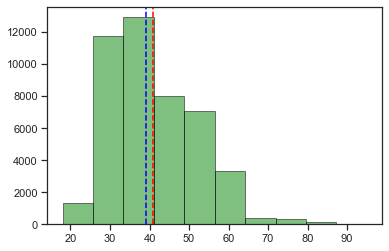

In [98]:
Age_Dist = plt.hist(Term_Data.age,bins=10,color='Green',edgecolor="Black",alpha=0.5)
plt.axvline(Term_Data.age.mean(),color="Red",linestyle="dashed")
plt.axvline(Term_Data.age.median(),color="Blue", linestyle="dashed")

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. 5 point analysis on duration features.</p></FONT>
     <FONT STYLE="color:Blue  ; font-size: 10pt">
        <p><ol><b>Duration :</p></FONT>
</SPAN>

In [99]:
print("Mean of feature duration : ",round(Term_Data.duration.mean(),2))
print("Median of feature duration : ",Term_Data.duration.median())
print("Mode of feature duration : ",Term_Data.duration.mode())
print("skewness of feature duration : ",Term_Data.duration.skew())
print("--------------------------------------------------------------------------------")
print("Min : ", Term_Data.duration.min())
print("Q1 - 25% of feature duration : ",Term_Data.duration.quantile(q=0.25))
print("Q2 - 50% of feature duration : ",Term_Data.duration.quantile(q=0.5))
print("Q3 - 75% of feature duration : ",Term_Data.duration.quantile(q=0.75))
print("Max : ", Term_Data.duration.max())


Mean of feature duration :  258.16
Median of feature duration :  180.0
Mode of feature duration :  0    124
dtype: int64
skewness of feature duration :  3.144318099423456
--------------------------------------------------------------------------------
Min :  0
Q1 - 25% of feature duration :  103.0
Q2 - 50% of feature duration :  180.0
Q3 - 75% of feature duration :  319.0
Max :  4918


<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>In order to understand the data distribution we carried above step and it reveals the data as shown in result area
        <br> to understand with visualization we can plot bellow plot
               </p>        
       </FONT>
</SPAN>

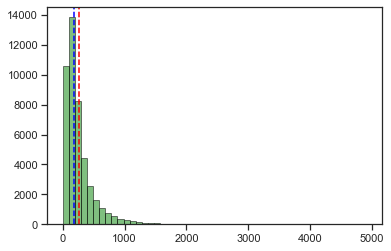

In [100]:
Age_Dist = plt.hist(Term_Data.duration,bins=50,color='Green',edgecolor="Black",alpha=0.5)
plt.axvline(Term_Data.duration.mean(),color="Red",linestyle="dashed")
plt.axvline(Term_Data.duration.median(),color="Blue", linestyle="dashed")

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. Identifying outliers.</p></FONT>
     <FONT STYLE="color:Blue  ; font-size: 10pt">
        <p><ol><b>Features used : Balance, Target and JOb</p></FONT>
</SPAN>

[Text(0, 0, 'unknown'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

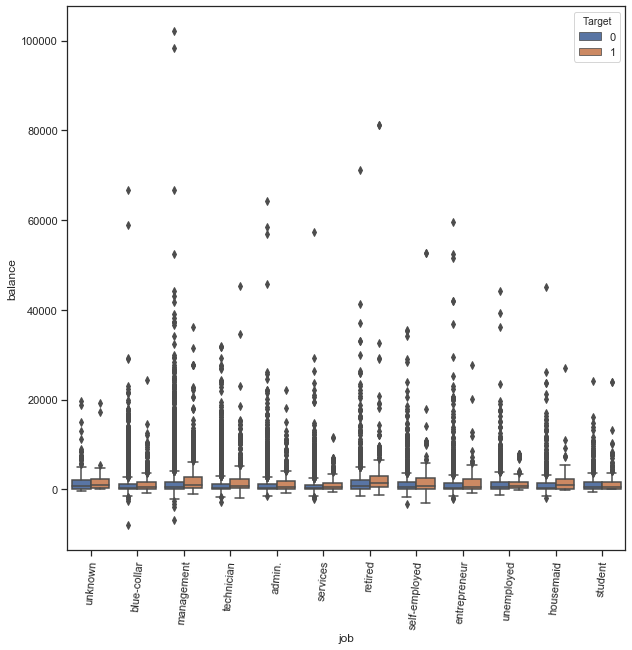

In [101]:
Job_label = ["unknown","blue-collar","management","technician","admin.","services","retired","self-employed","entrepreneur","unemployed","housemaid","student"]
out, ax = plt.subplots(figsize=(10,10))
outdata = sns.boxplot(x=Term_Data.job,y=Term_Data.balance, hue=Term_Data.Target)
ax.set_xticklabels(labels=Job_label,rotation=85)

<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>Above graph shows that the lot of out liers when we compare balance and type of job categories
               </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. We will understand each feature distribution and significance of the feture with target.      
        <br>2. visualize the feture and its distribution.</p></FONT>
     <FONT STYLE="color:Blue  ; font-size: 10pt">
        <p><ol><b>Education :</p></FONT>
</SPAN>

[Text(0, 0, 'unknown'),
 Text(0, 0, 'secondary'),
 Text(0, 0, 'tertiary'),
 Text(0, 0, 'primary')]

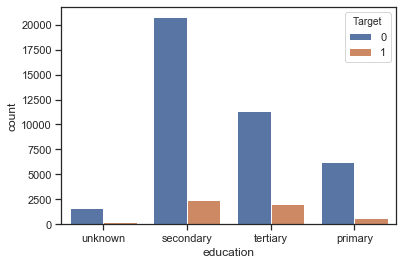

In [102]:
label = ["unknown","secondary","tertiary","primary"]
Education = sns.countplot(x=Term_Data.education,hue=Term_Data.Target)
Education.set_xticklabels(label)

<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. It is evident that, people who has highet qualification will opted for Term diposite rather than the lower qulified people.
        </p>        
       </FONT>
</SPAN>

(-1991.463771790298,
 1999.6206121001915,
 -1995.778776247749,
 1980.7513702975073)

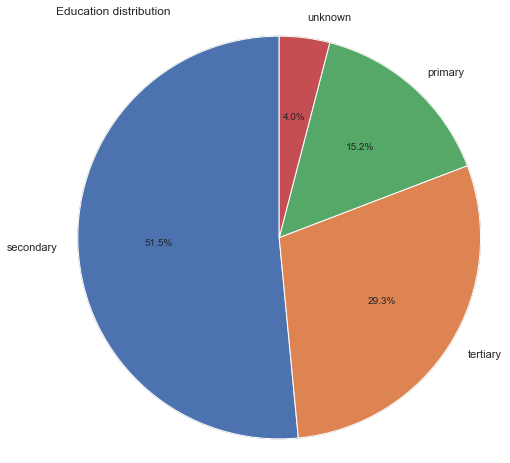

In [103]:
size=[]
def collect_size(x,y):
    size.append(round((x/y)*100))
    
for n in Term_Data.education.value_counts():
    collect_size(n,len(Term_Data.education))

label = ["secondary","tertiary","primary","unknown"]
explodes = (0.5,0,0,0)
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.set_title(label="Education distribution",loc="left")
ax1.pie(size,labels=label,explode=explodes,autopct='%1.1f%%',shadow=True,startangle=90,radius=1800)
ax1.axis('equal')


<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. The record consist of more highly qualified people of 51.5%
        <br>2. Although the higher education population is more, number of people of who opted for term diposite is significant low and hence we will explore some more data so that we can have more reasons for the same.
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: Blue  ; font-size: 10pt"><strong>Marital : </strong>
</SPAN>

[Text(0, 0, 'married'), Text(0, 0, 'single'), Text(0, 0, 'divorced')]

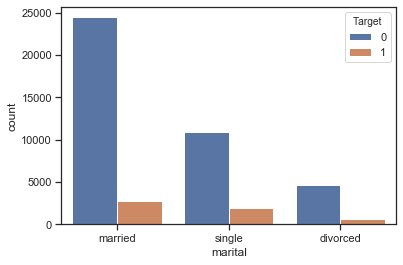

In [104]:
Marital_label = ["married","single","divorced"]
Marital_status = sns.countplot(x=Term_Data.marital,hue=Term_Data.Target)
Marital_status.set_xticklabels(Marital_label)

<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. Married people will opt term deposite more than the other category people.
        </p>        
       </FONT>
</SPAN>

(-2004.0413254086495,
 1994.8525062701574,
 -2003.3870965568112,
 1981.113704642331)

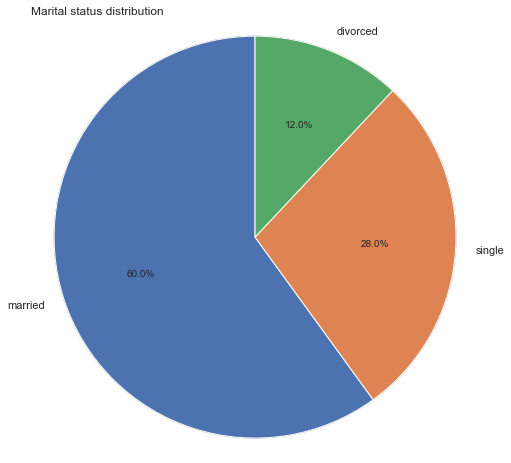

In [105]:
Marital_size=[]
def collect_size(x,y):
    Marital_size.append(round((x/y)*100))
    
for n in Term_Data.marital.value_counts():
    collect_size(n,len(Term_Data.marital))
    
label_Marital = ["married","single","divorced"]
explodes = (1,0,0,0)
fig2, ax2 = plt.subplots(figsize=(8,8))
ax2.set_title(label="Marital status distribution",loc="left")
ax2.pie(Marital_size,labels=label_Marital, autopct='%1.1f%%',shadow=True,startangle=90,radius=1800)
ax2.axis('equal')

<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. Percentage of married people are more in the data set
        <br>2. Still the it is not conviensing the reason for not opting termed deposite from the people
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. Observing the above analysis it is important to know the relationship between the features with target hence, we will conduct bivariate analysis among the Age, Education, Marital status, housing, loan  
        </p>        
       </FONT>

<SPAN STYLE="color: Blue  ; font-size: 10pt"><strong>JOB : </strong>
</SPAN>

[Text(0, 0, 'blue-collar'),
 Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student'),
 Text(0, 0, 'unknown')]

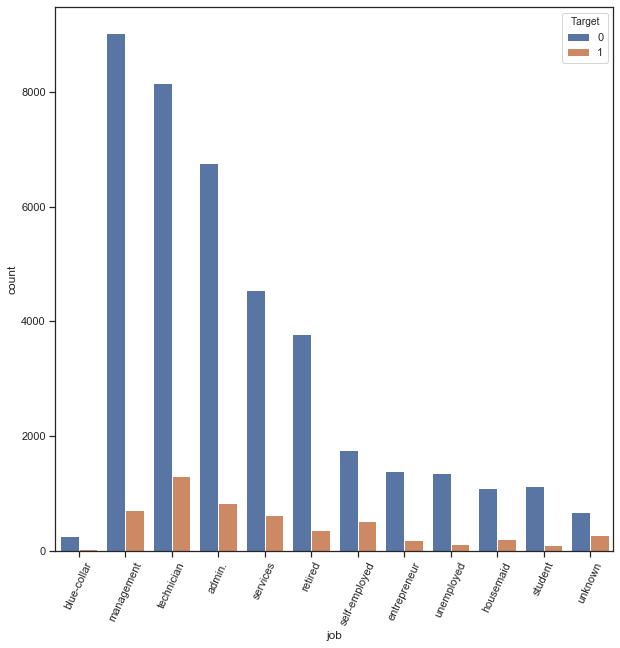

In [106]:
Job_label = ["blue-collar","management","technician","admin.","services","retired","self-employed","entrepreneur","unemployed","housemaid","student","unknown"]
fig, ax = plt.subplots(figsize=[10,10])
Job_status = sns.countplot(x=Term_Data.job,hue=Term_Data.Target)
Job_status.figize=[10,10]
Job_status.set_xticklabels(Job_label, rotation = 65)

<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. No Relevence information found between the target and the types of job of the people.
        </p>        
       </FONT>
</SPAN>

(-2025.326282480427,
 1986.8196438583757,
 -2003.4631615852643,
 1981.1172934088222)

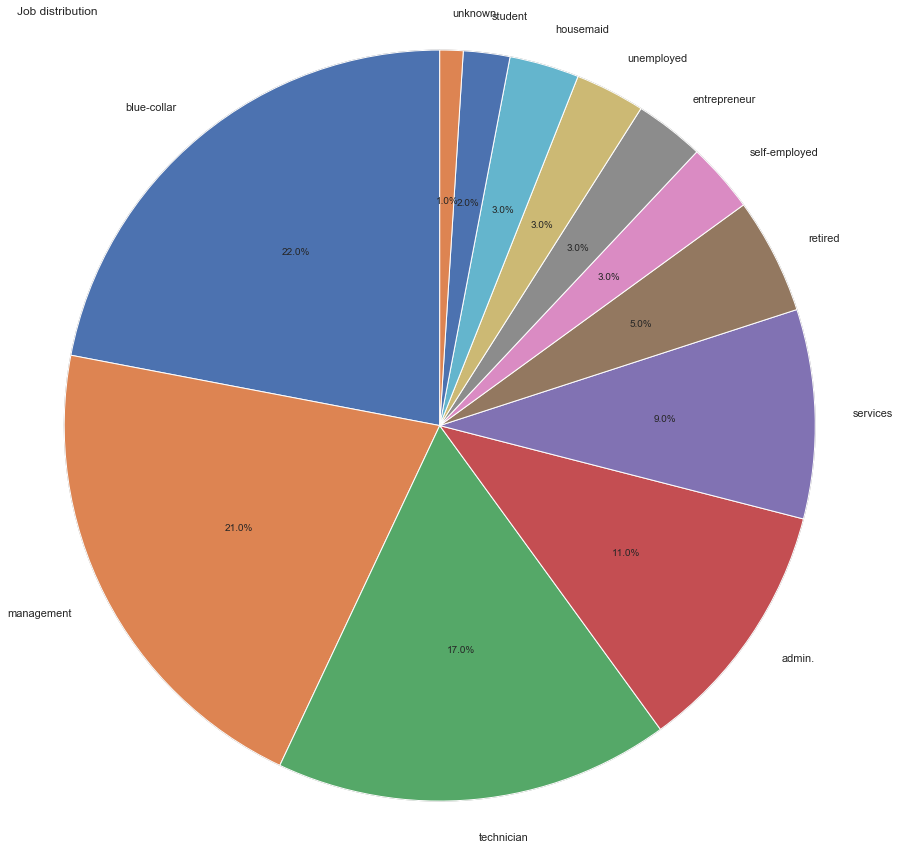

In [107]:
job_size=[]
def collect_size(x,y):
    job_size.append(round((x/y)*100))
    
for n in Term_Data.job.value_counts():
    collect_size(n,len(Term_Data.job))
    
label_job = ["blue-collar","management","technician","admin.","services","retired","self-employed","entrepreneur","unemployed","housemaid","student","unknown"]
explodes = (1,0,0,0)
fig3, ax3 = plt.subplots(figsize=(15,15))
ax3.set_title(label="Job distribution",loc="left")
ax3.pie(job_size,labels=label_job, autopct='%1.1f%%',shadow=True,startangle=90,radius=1800)
ax3.axis('equal')

<SPAN STYLE="color: Blue  ; font-size: 10pt"><strong>How Job Category and balence is associated : </strong>
</SPAN>

[Text(0, 0, 'unknown'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

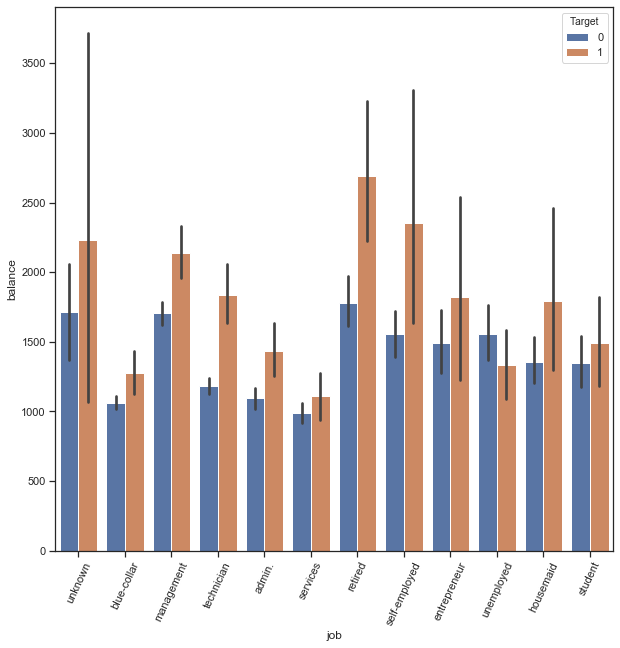

In [108]:
JobLabel = ["unknown","blue-collar","management","technician","admin.","services","retired","self-employed","entrepreneur","unemployed","housemaid","student"]
fig0, ax0 = plt.subplots(figsize=(10,10))
sns.barplot(x=Term_Data.job,y=Term_Data.balance,hue=Term_Data.Target)
ax0.set_xticklabels(JobLabel, rotation = 65)

<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. If you observe the above graph that reveals that each category people will go for Term deposite but the key take away is thatht the retired and self emplyed will go more with term deposite rather than any other category job holders.
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. Untill now we understood how customer information influencing in opting the Term deposite
        <br>2. Now we will understand how canpaign will influence.
        </p>        
       </FONT>
</SPAN>

In [109]:
Campaign_Data = pd.DataFrame(Term_Data[['day','month','duration','campaign','pdays','Target']])
Campaign_Data.head()

,day,month,duration,campaign,pdays,Target
0,5,1,261,1,-1,0
1,5,1,151,1,-1,0
2,5,1,76,1,-1,0
3,5,1,92,1,-1,0
4,5,1,198,1,-1,0


In [110]:
Campaign_Data.nunique()

day           31
month         12
duration    1573
campaign      48
pdays        559
Target         2
dtype: int64

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1.Let us understand how duration feature influences on purchasing term deposite
        </p>        
       </FONT>
</SPAN>


Text(0.5, 1.0, 'Target infulence with duration of call for each day')

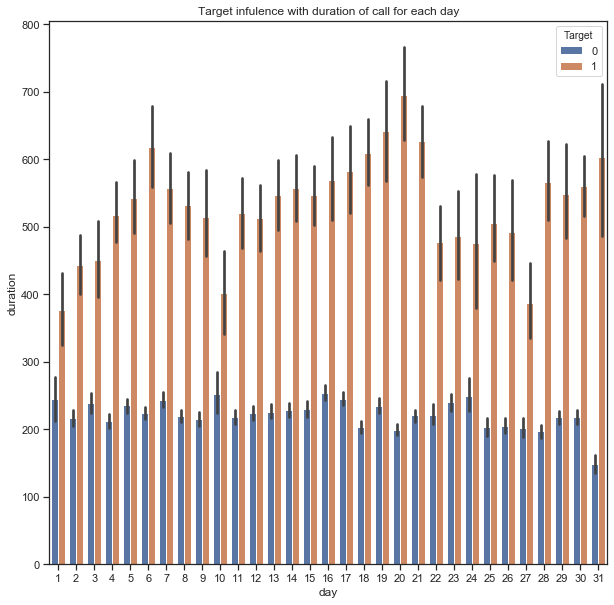

In [111]:
figDay, ax_Day = plt.subplots(figsize=(10,10))
sns.barplot(x=Campaign_Data.day,y=Campaign_Data.duration,hue=Campaign_Data.Target).set_title("Target infulence with duration of call for each day")

<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. Duration of the phone call will definatly infulences on purchasing the Term deposite.
        <br>2. Target and duration hace stronng association.
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. Since we found that the duration of phone call to customer has an powerfull impact,
        <br>let us understand how balance influences.
        </p>        
       </FONT>
</SPAN>

Text(0.5, 1.0, 'Influence of balance and duration')

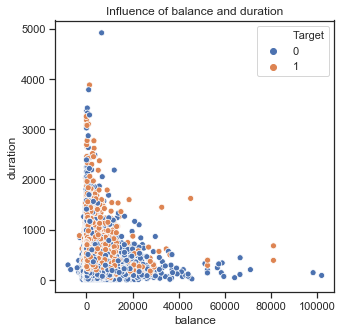

In [112]:
figDay, ax_Day = plt.subplots(figsize=(5,5))
sns.scatterplot(x=Term_Data.balance,y=Term_Data.duration,hue=Term_Data.Target).set_title("Influence of balance and duration")

<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. As it is evident, duration and balance both are influencing factors to purchasing term deposite        
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. Let us understand how other campaign related features will influence. Hence we will plot pairplot
        </p>        
       </FONT>
</SPAN>

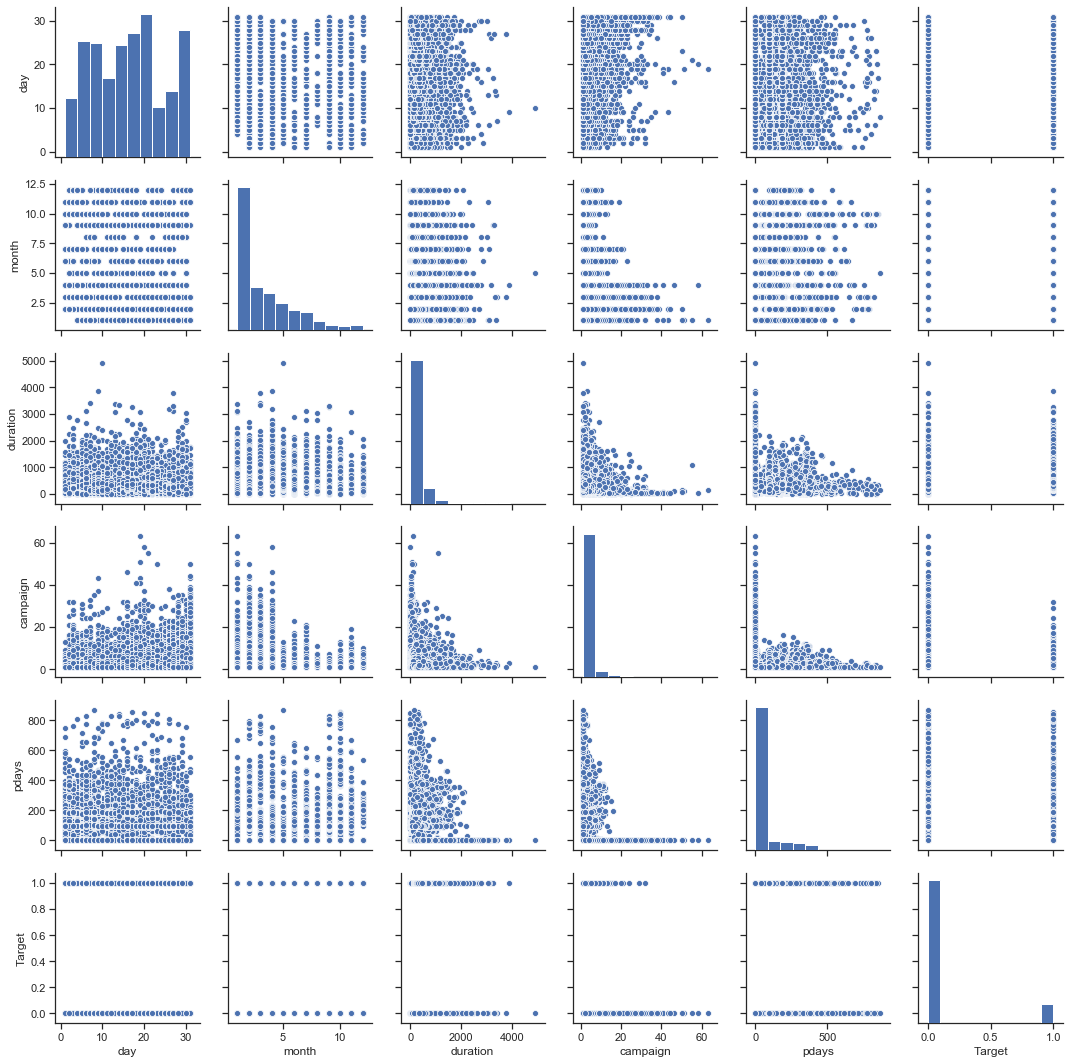

In [113]:
sns.set(style="ticks")
sns.pairplot(Campaign_Data,palette="Set1")

<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b> 1. Duration Vs Campaign : Shows that the campaign of shorter duration is more than the longer duration it may affect for our target variable.
        <br> 2. Duration Vs pdays : shows that the regorous campaign is missing as number of contacts per a person will decrease as days passes.
        <br> 3. If you obser the target results, number of sucess or customer who opted for term deposite is less than the not opted.
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. Identifying the correlation between the all the features.</p></FONT>

</SPAN>

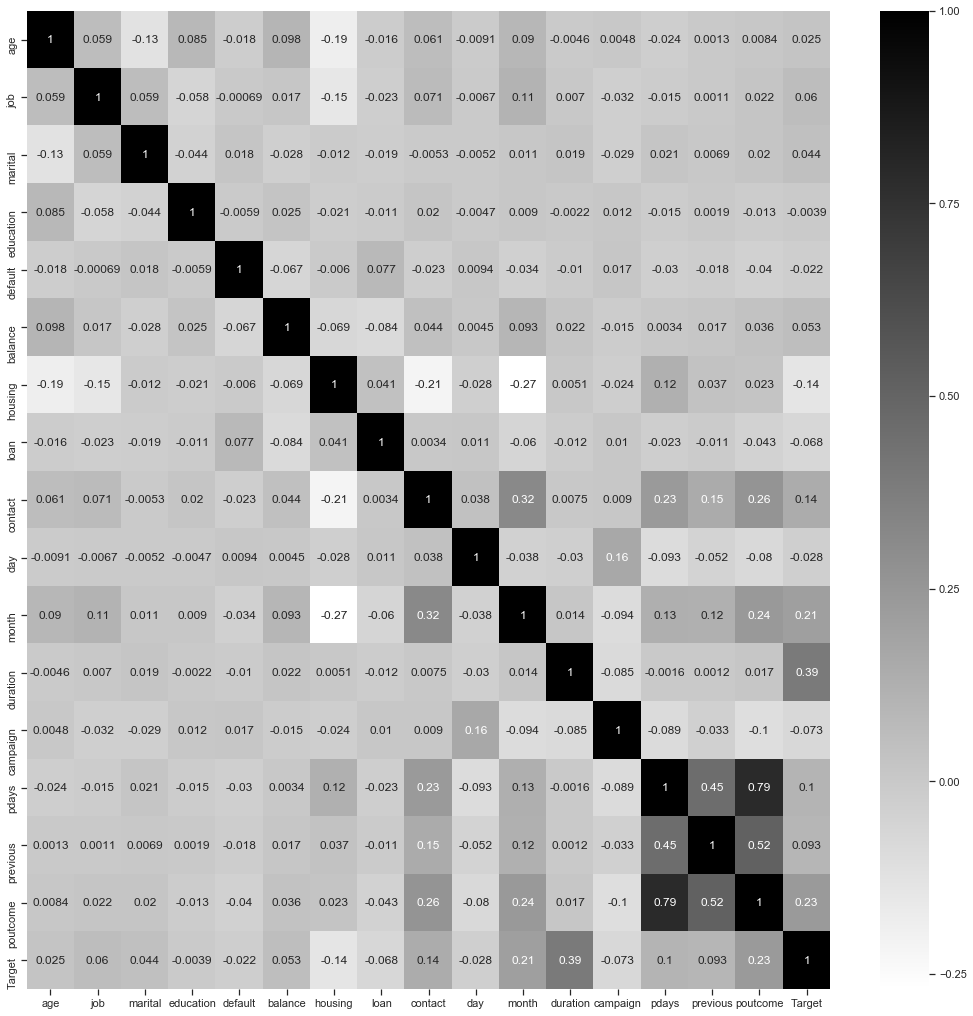

In [114]:
corr = Term_Data.corr()
fs,ax = plt.subplots(figsize=(18,18))
sns.heatmap(corr,annot=True,annot_kws={"size":12},cmap='gist_yarg')

<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. Since we have seen lot of unkown values and we defined as -ve in nature that may reflacting in the correlations.
        <br> there are some strong relations between pdays and the outcome and balence and the duration features.
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff006a ; font-size: 20pt"><strong>Building Model : </strong>

</SPAN>

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Scalling the Data</strong>

</SPAN>

In [115]:
# from scipy.stats import zscore

# Term_Data = Term_Data.apply(zscore)



In [116]:
Term_Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,1,2,0,2143,1,0,-1,5,1,261,1,-1,0,-1,0
1,44,3,2,1,0,29,1,0,-1,5,1,151,1,-1,0,-1,0
2,33,8,1,1,0,2,1,1,-1,5,1,76,1,-1,0,-1,0
3,47,1,1,-1,0,1506,1,0,-1,5,1,92,1,-1,0,-1,0
4,33,-1,2,-1,0,1,0,0,-1,5,1,198,1,-1,0,-1,0


<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Splitting the data</strong>

</SPAN>

In [117]:
X=Term_Data.drop('Target', axis=1)
y=Term_Data.pop('Target')

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Building Decision Tree Model </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>Goal is to get select more stable scored model hence following steps are taken
        <br><ol> 1. Looped through both gini coefficient and entropy criterions
        <br> 2. Iterated for multiplevel of Max_depth values
        <br></ol>
        </p>        
       </FONT>
</SPAN>

In [119]:
def build_Model(Level_depth, Method_Type):
    Term_Tree = DecisionTreeClassifier(criterion = Method_Type, max_depth=Level_depth,random_state=1)
    Term_Tree.fit(X_train, y_train)
    print("Depth Level : ",Level_depth)
    print("Training data Model Score = ", Term_Tree.score(X_train,y_train))
    print("Test data Model Score = ",Term_Tree.score(X_test,y_test))
    
print("----------GINI Index Score--------------------")
for val in range(1,6):
    build_Model(val, 'gini')
    
print("----------ENTROPY Score--------------------")

for val in range(1,6):
    build_Model(val, 'entropy')
    

----------GINI Index Score--------------------
Depth Level :  1
Training data Model Score =  0.8818845388188454
Test data Model Score =  0.8856531996461221
Depth Level :  2
Training data Model Score =  0.8947767560906247
Test data Model Score =  0.8962695370097317
Depth Level :  3
Training data Model Score =  0.9007804847220906
Test data Model Score =  0.9023149513417871
Depth Level :  4
Training data Model Score =  0.9033715676051443
Test data Model Score =  0.9027572987319374
Depth Level :  5
Training data Model Score =  0.9041931304705028
Test data Model Score =  0.9014302565614863
----------ENTROPY Score--------------------
Depth Level :  1
Training data Model Score =  0.8818845388188454
Test data Model Score =  0.8856531996461221
Depth Level :  2
Training data Model Score =  0.8892786046070718
Test data Model Score =  0.8925095841934533
Depth Level :  3
Training data Model Score =  0.8997693304262647
Test data Model Score =  0.9014302565614863
Depth Level :  4
Training data Model 

<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>1. If we observe the scores at entropy and max depth of 5 both scores are stable and which is good for our further model building process
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Visualization of Decision Tree using - GRAPHVIZ </strong>

</SPAN>

In [120]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [121]:
dot_data = StringIO()
export_graphviz(Term_Tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Term_Data_Subscriber.png')
Image(graph.create_png())

NameError: name 'Term_Tree' is not defined

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Building model for stable decision tree </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b>Based on the above observation, we can taken the values of 5 for max depth and enptropy criterion for our actual model building process.
        </ol>
        </p>        
       </FONT>
</SPAN>

In [ ]:
    Term_Tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5,random_state=1)
    Term_Tree.fit(X_train, y_train)
    print("Training data Model Score = ", Term_Tree.score(X_train,y_train))
    print("Test data Model Score = ",Term_Tree.score(X_test,y_test))

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Confusion Matrix </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b> Inorder to undestand how model predicted we will get the confusion matrix
        </ol>
        </p>        
       </FONT>
</SPAN>

In [ ]:
print("Score of the Decision Tree : ",Term_Tree.score(X_test,y_test),"\n")
from sklearn.metrics import confusion_matrix
Y_Predict = Term_Tree.predict(X_test)
Y_True = y_test
Confusion = confusion_matrix(Y_True,Y_Predict,labels=[0,1])

Df_Confusion = pd.DataFrame(Confusion, index=[i for i in ['No','Yes']],columns=[i for i in ['No','Yes']])
print("Confusion matrix Actual numbers for prediction :\n",Df_Confusion)

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(Df_Confusion,annot=True)
ax.set_title("Confusion matrix",fontdict={'fontsize':15,'fontweight':1})

<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : Confusion Matrix</strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b> if we observe the False positive and True Positive which is good result prediction
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Regularizing/Pruning Model </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b> Inorder to increase the accuracy we can still use pruning method
        </ol>
        </p>        
       </FONT>
</SPAN>

In [ ]:
Range_List = [100,300,500,800,1000]
for k in Range_List:
    Pruned_Term_Tree = DecisionTreeClassifier(criterion='entropy',random_state=k,max_depth=3,min_samples_split=3)
    Pruned_Term_Tree.fit(X_train,y_train)
    Predicted_Term = Pruned_Term_Tree.predict(X_test)
    Predicted_Term_Train = Pruned_Term_Tree.predict(X_train)
    print("Random State value : ",k)
    print("Accurance Score for Pruned model for Train : ",accuracy_score(y_train,Predicted_Term_Train))
    print("Accurance Score for Pruned model for Test : ",accuracy_score(y_test,Predicted_Term))


<SPAN STYLE="color: #ffbf00  ; font-size: 15pt"><strong>Observation : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b> if we observe the values of scores no much difference found hence the model can be sayed as stable.
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Build the model for pruned parameters </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b> MAX_DEPTH = 3 and entropy and RANDOM STATE= 100        
        </p>        
       </FONT>
</SPAN>

In [ ]:
from sklearn.metrics import precision_score
Pruned_Term_Tree = DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3,min_samples_split=3)
Pruned_Term_Tree.fit(X_train,y_train)
Predicted_Term = Pruned_Term_Tree.predict(X_test)
Predicted_Term_Train = Pruned_Term_Tree.predict(X_train)

In [ ]:
# Measuring Matrics
Pruned_Term_Tree_Decision_Acc = accuracy_score(y_test,Predicted_Term)
Pruned_Term_Tree_recall_Score = recall_score(y_test,Predicted_Term)
Pruned_Term_Tree_precision_score = precision_score(y_test,Predicted_Term)
print("Accurancy Score for Pruned model of Prediction sample : ",Pruned_Term_Tree_Decision_Acc)
print("Recall Score for Pruned model of Prediction sample : ",Pruned_Term_Tree_recall_Score)
print("Precission Score for Pruned model of Prediction sample : ",Pruned_Term_Tree_precision_score)

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Pruned Decision tree visualization  </strong>
</SPAN>

In [ ]:
dot_data = StringIO()
export_graphviz(Pruned_Term_Tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Term_Data_Subscriber.png')
Image(graph.create_png())

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b> In order to understand the features which are important we can get important features from the model
        </p>        
       </FONT>
</SPAN>

In [ ]:
Important_Feats = Term_Tree.tree_.compute_feature_importances(normalize=False)
Dict_Imp_Features = dict(zip(Term_Data.columns, Term_Tree.feature_importances_))
Features = pd.DataFrame.from_dict(Dict_Imp_Features,orient='index')
Features.sort_values(by=0,ascending=False)

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Let us build other ensemble models to compare </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b> we will build following models and compare all including Decision Tree :
            <br><p><ol> 1. Random Forest
        <br>2. Ada Boosting
        <br>3. Bagging Classifier
        <br>4. Gradient Classifiers        
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: Blue  ; font-size: 15pt"><strong>1. Build "Random Forest" Model </strong>
</SPAN>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random_Model = RandomForestClassifier(n_estimators=10,criterion='entropy')
Random_Model = Random_Model.fit(X_train,y_train)
Model_Prediction = Random_Model.predict(X_test)

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Confusion Matrix </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">     
       </FONT>
</SPAN>

In [ ]:
print("Score of the Random Forest : ",Random_Model.score(X_test,y_test),"\n")
from sklearn.metrics import confusion_matrix
YRam_Predict = Random_Model.predict(X_test)
YRam_True = y_test
ConfusionRam = confusion_matrix(YRam_True,YRam_Predict,labels=[0,1])

Df_ConfusionRam = pd.DataFrame(ConfusionRam, index=[i for i in ['No','Yes']],columns=[i for i in ['No','Yes']])
print("Confusion matrix Actual numbers for prediction :\n",Df_ConfusionRam)

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(Df_ConfusionRam,annot=True)
ax.set_title("Confusion matrix",fontdict={'fontsize':15,'fontweight':1})

In [ ]:
# Measuring Matrics
Random_Model_Random_Acc = accuracy_score(y_test,Model_Prediction)
Random_Model_recall_Score = recall_score(y_test,Model_Prediction)
Random_Model_precision_score = precision_score(y_test,Model_Prediction)
print("Accurancy Score for Pruned model of Prediction sample : ",Random_Model_Random_Acc)
print("Recall Score for Pruned model of Prediction sample : ",Random_Model_recall_Score)
print("Precission Score for Pruned model of Prediction sample : ",Random_Model_precision_score)

<SPAN STYLE="color: Blue  ; font-size: 15pt"><strong>2. Build "Ada Boosting" Model </strong>
</SPAN>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Ada_Model = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=100)
Ada_Model = Ada_Model.fit(X_train,y_train)
Ada_Prediction = Ada_Model.predict(X_test)

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Confusion Matrix </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">     
       </FONT>
</SPAN>

In [ ]:
print("Score of the Random Forest : ",Ada_Model.score(X_test,y_test),"\n")
from sklearn.metrics import confusion_matrix
YAda_Predict = Ada_Model.predict(X_test)
YAda_True = y_test
ConfusionAda = confusion_matrix(YAda_True,YAda_Predict,labels=[0,1])

Df_ConfusionAda = pd.DataFrame(ConfusionAda, index=[i for i in ['No','Yes']],columns=[i for i in ['No','Yes']])
print("Confusion matrix Actual numbers for prediction :\n",Df_ConfusionAda)

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(Df_ConfusionAda,annot=True)
ax.set_title("Confusion matrix",fontdict={'fontsize':15,'fontweight':1})

In [ ]:
# Measuring Matrics
Ada_Model_Ada_Acc = accuracy_score(y_test,Ada_Prediction)
Ada_Model_recall_Score = recall_score(y_test,Ada_Prediction)
Ada_Model_precision_score = precision_score(y_test,Ada_Prediction)
print("Accurancy Score for Pruned model of Prediction sample : ",Ada_Model_Ada_Acc)
print("Recall Score for Pruned model of Prediction sample : ",Ada_Model_recall_Score)
print("Precission Score for Pruned model of Prediction sample : ",Ada_Model_precision_score)


<SPAN STYLE="color: Blue  ; font-size: 15pt"><strong>3. Build "Bagging Classifiers" Model </strong>
</SPAN>

In [ ]:
from sklearn.ensemble import BaggingClassifier
Bag_Model = BaggingClassifier(n_estimators=50, max_samples=1.0, max_features=1.0)
Bag_Model = Bag_Model.fit(X_train,y_train)
Bag_Predictor = Bag_Model.predict(X_test)


<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Confusion Matrix </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">     
       </FONT>
</SPAN>

In [ ]:
print("Score of the Random Forest : ",Bag_Model.score(X_test,y_test),"\n")
from sklearn.metrics import confusion_matrix
YBag_Predict = Bag_Model.predict(X_test)
YBag_True = y_test
ConfusionBag = confusion_matrix(YBag_True,YBag_Predict,labels=[0,1])

Df_ConfusionBag = pd.DataFrame(ConfusionBag, index=[i for i in ['No','Yes']],columns=[i for i in ['No','Yes']])
print("Confusion matrix Actual numbers for prediction :\n",Df_ConfusionBag)

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(Df_ConfusionBag,annot=True)
ax.set_title("Confusion matrix",fontdict={'fontsize':15,'fontweight':1})

In [ ]:
Bag_Model_Bag_Acc = accuracy_score(y_test,Bag_Predictor)
Bag_Model_recall_Score = recall_score(y_test,Bag_Predictor)
Bag_Model_precision_score = precision_score(y_test,Bag_Predictor)
print("Accurancy Score for Pruned model of Prediction sample : ",Bag_Model_Bag_Acc)
print("Recall Score for Pruned model of Prediction sample : ",Bag_Model_recall_Score)
print("Precission Score for Pruned model of Prediction sample : ",Bag_Model_precision_score)

<SPAN STYLE="color: Blue  ; font-size: 15pt"><strong>4. Build "Gradient Classifier" Model </strong>
</SPAN>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Grad_Model = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1)
Grad_Model = Grad_Model.fit(X_train,y_train)
Grad_Predictor = Grad_Model.predict(X_test)

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Confusion Matrix </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">     
       </FONT>
</SPAN>

In [ ]:
print("Score of the Random Forest : ",Grad_Model.score(X_test,y_test),"\n")
from sklearn.metrics import confusion_matrix
YGrad_Predict = Grad_Model.predict(X_test)
YGrad_True = y_test
ConfusionGrad = confusion_matrix(YGrad_True,YGrad_Predict,labels=[0,1])

Df_ConfusionGrad = pd.DataFrame(ConfusionGrad, index=[i for i in ['No','Yes']],columns=[i for i in ['No','Yes']])
print("Confusion matrix Actual numbers for prediction :\n",Df_ConfusionGrad)

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(Df_ConfusionGrad,annot=True)
ax.set_title("Confusion matrix",fontdict={'fontsize':15,'fontweight':1})

In [ ]:
Grad_Model_Grad_Acc = accuracy_score(y_test,Grad_Predictor)
Grad_Model_recall_Score = recall_score(y_test,Grad_Predictor)
Grad_Model_precision_score = precision_score(y_test,Grad_Predictor)

print("Accurancy Score for model of Prediction sample : ",Grad_Model_Grad_Acc)
print("Recall Score for model of Prediction sample : ",Grad_Model_recall_Score)
print("Precission Score for model of Prediction sample : ",Grad_Model_precision_score)


<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Compare Model with difference Measuring Matrix </strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b> 1. Compare Accuracy.
        <br>2. Compare Recall Score.
        <br>3. Compare Precision Score.
        <br>4. Get the AUC and Draw ROC Curve
        </p>        
       </FONT>
</SPAN>

In [ ]:
resultsDf = pd.DataFrame({'Method':['1','2','3','4','5'], 
                          'Accuracy': [Pruned_Term_Tree_Decision_Acc,Random_Model_Random_Acc,Ada_Model_Ada_Acc,Bag_Model_Bag_Acc,Grad_Model_Grad_Acc],
                         'Recall_Score':[Pruned_Term_Tree_recall_Score,Random_Model_recall_Score,Ada_Model_recall_Score,Bag_Model_recall_Score,Grad_Model_recall_Score],
                          'Precission_Score':[Pruned_Term_Tree_precision_score,Random_Model_precision_score,Ada_Model_precision_score,Bag_Model_precision_score,Grad_Model_precision_score]},
                         index=['Decision Tree','Random Forest','Ada Booster','Baging Classifiers','Gradient Boosting'])
resultsDf = resultsDf[['Method', 'Accuracy', 'Recall_Score','Precission_Score']]
resultsDf

In [ ]:
print('Maximum accuracy value among all methods : \n',resultsDf.max())

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : ROC curve computation from different models</strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b> Identify AUC values to draw ROC Curve
        </p>        
       </FONT>
</SPAN>

In [ ]:
from sklearn.metrics import auc

# ROC Curve for preparation for Decision Tree
fpr_Dt, tpr_Dt, thresholds_Dt = roc_curve(y_test,Predicted_Term)
roc_auc_Dt = auc(fpr_Dt, tpr_Dt)
print("Area under the ROC curve : %f" % roc_auc_Dt)

# ROC Curve for preparation for Random Forest
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test,Model_Prediction)
roc_auc_RF = auc(fpr_RF, tpr_RF)
print("Area under the ROC curve : %f" % roc_auc_RF)

# ROC Curve for preparation for Ada Booster
fpr_Ada, tpr_Ada, thresholds_Ada = roc_curve(y_test,Ada_Prediction)
roc_auc_Ada = auc(fpr_Ada, tpr_Ada)
print("Area under the ROC curve : %f" % roc_auc_Ada)

# ROC Curve for preparation for Bagging
fpr_Bag, tpr_Bag, thresholds_Bag = roc_curve(y_test,Bag_Predictor)
roc_auc_Bag = auc(fpr_Bag, tpr_Bag)
print("Area under the ROC curve : %f" % roc_auc_Bag)

# ROC Curve for preparation for Gradient Booster
fpr_Grad, tpr_Grad, thresholds_Grad = roc_curve(y_test,Grad_Predictor)
roc_auc_Grad = auc(fpr_Grad, tpr_Grad)
print("Area under the ROC curve : %f" % roc_auc_Grad)



<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Draw ROC Curv</strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b> Draw ROC Curve using above AUV computed values
        </p>        
       </FONT>
</SPAN>

In [ ]:
plt.clf()
plt.figure(figsize=(10,10))
plt.plot(fpr_Dt, tpr_Dt, label='ROC curve for Decision Tree (area = %0.2f)' % roc_auc_Dt)
plt.plot(fpr_RF, tpr_RF, label='ROC curve for Random Forest (area = %0.2f)' % roc_auc_RF)
plt.plot(fpr_Ada, tpr_Ada, label='ROC curve for Ada Boosting (area = %0.2f)' % roc_auc_Ada)
plt.plot(fpr_Bag, tpr_Bag, label='ROC curve for Bagging (area = %0.2f)' % roc_auc_Bag)
plt.plot(fpr_Grad, tpr_Grad, label='ROC curve for Gradient Boosting (area = %0.2f)' % roc_auc_Grad)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right")
plt.show()

<SPAN STYLE="color: #00c8ff  ; font-size: 15pt"><strong>Conclusion : </strong>
    <FONT STYLE="color:Black  ; font-size: 12pt">
        <p><ol><b>1. By comparing the results of the different models with various measuring matrics it is eveident that the score with  accuracy = 0.90629, Bagging Classifier is best model.     
        <br>2. Area under the ROC curve with bagging model it has grater coverage and also emphasises the Bagging model is good prediction than other model.
        </p>        
       </FONT>
</SPAN>

<SPAN STYLE="color: #ff3c00  ; font-size: 15pt"><strong>Action : Tuning the model</strong>
    <FONT STYLE="color:Black  ; font-size: 10pt">
        <p><ol><b> Based on the above obesrvation we will consider Bagging model and try to tune the prediction, we wll consider bellow steps.
        <br><ol>1. we will drop "Month and JOB" features as it has highest categoricall values.        
        </p>        
       </FONT>
</SPAN>

In [ ]:
Term_Data_Model_Build.head()

In [ ]:
Term_Data_Model_Build = Term_Data_Model_Build.drop(['job','month'],axis=1)

In [ ]:
Term_Data_Model_Build.head()

In [ ]:
X_Vals = Term_Data_Model_Build.drop('Target',axis=1)
y_Vals = Term_Data_Model_Build.pop('Target')

In [ ]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_Vals, y_Vals, test_size=0.33, random_state=1)

In [ ]:
from sklearn.ensemble import BaggingClassifier
Bagg_Model_m = BaggingClassifier(n_estimators=50, max_samples=1.0, max_features=1.0)
Bagg_Model_m = Bag_Model.fit(X_train_m,y_train_m)

In [ ]:
Bagg_Predictor_m = Bagg_Model_m.predict(X_test_m)
Bagg_Acc_m = accuracy_score(y_test_m,Bagg_Predictor_m)
print(Bagg_Acc_m)

In [ ]:
print("Score of the Decision Tree : ",Bagg_Model_m.score(X_test_m,y_test_m),"\n")
from sklearn.metrics import confusion_matrix
Y_Predict_m = Bagg_Model_m.predict(X_test_m)
Y_True_m = y_test_m
Confusion_m = confusion_matrix(Y_True_m,Y_Predict_m,labels=[0,1])

Df_Confusion_m = pd.DataFrame(Confusion_m, index=[i for i in ['No','Yes']],columns=[i for i in ['No','Yes']])
print("Confusion matrix Actual numbers for prediction :\n",Df_Confusion_m)

fig_m, ax_m = plt.subplots(figsize=(7,5))
sns.heatmap(Df_Confusion,annot=True)
ax_m.set_title("Confusion matrix",fontdict={'fontsize':15,'fontweight':1})

In [ ]:
#ROC AUC curve for Bagging classifier

In [ ]:
# Model 1 
from sklearn.metrics import auc
fpr1, tpr1, thresholds1 = roc_curve(y_test,Bag_Predictor)
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

#Model 2
fpr2, tpr2, thresholds2 = roc_curve(y_test_m,Bagg_Predictor_m)
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

In [ ]:
plt.clf()
plt.plot(fpr1, tpr1, label='ROC curve for Bagging_1 (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='ROC curve for Bagging_2 (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right")
plt.show()

<SPAN STYLE="color: #00c8ff  ; font-size: 15pt"><strong>Conclusion : </strong>
    <FONT STYLE="color:Black  ; font-size: 12pt">
        <p><ol><b>By Trying to fine tune the performance we are loosing the performace of the model and hence we will stick with above bagging model 1 rather than the new bagging model.
       </FONT>
</SPAN>